In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
SEED = 42
N_JOBS = 8

In [3]:
DATA_PATH = '../data/archive.zip'

## Data Processing

In [4]:
raw_df = pd.read_csv(DATA_PATH)

In [5]:
raw_df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

Data were read as object. That's probabnly because this dataset uses comma as decimal separator.  
First column is definitely a date.  
Let's reread our data taking this into account

In [7]:
raw_df = pd.read_csv(
    DATA_PATH,
    decimal=",",
    parse_dates=["date"],
    infer_datetime_format=True)

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

This time data were read with proper data types.  
There are no missing values. 

Let's check for duplicates and delete them if nessesary.

In [9]:
raw_df.duplicated().sum()

1171

In [10]:
raw_df.drop_duplicates(inplace=True)

## EDA

In [11]:
raw_df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


Let's look at data distributions.

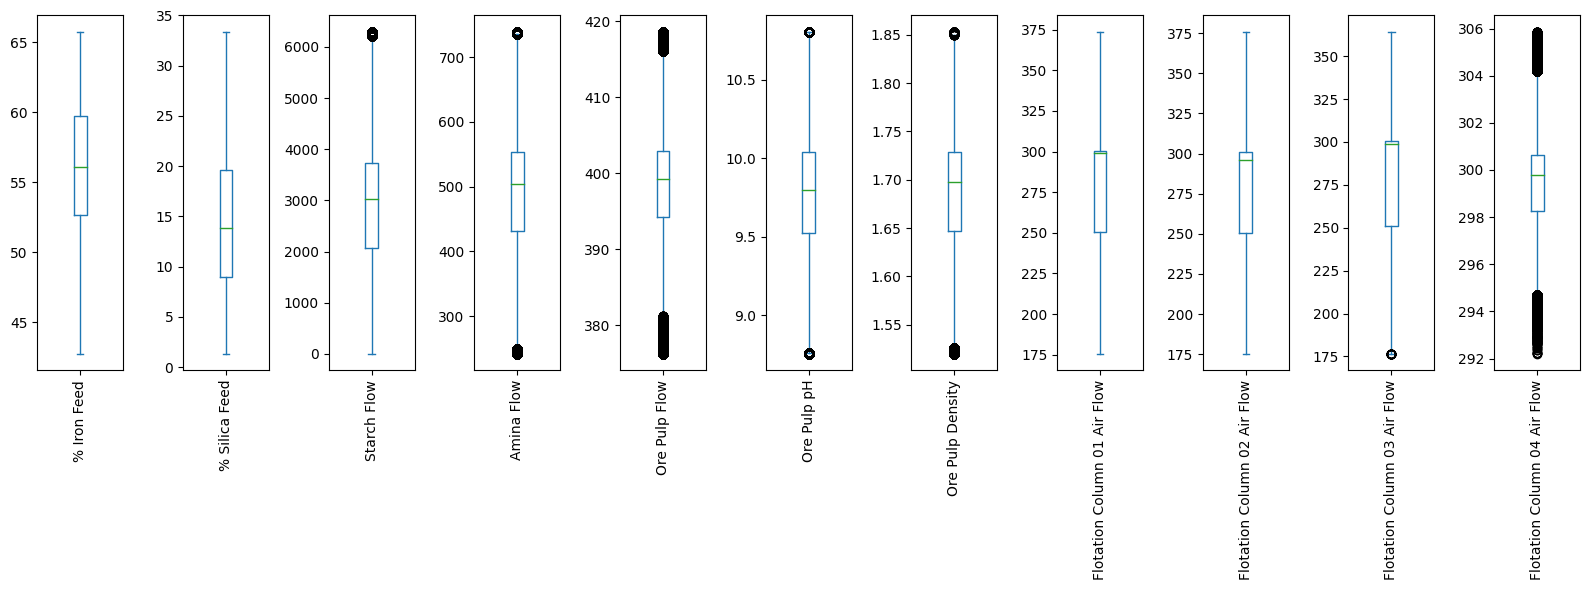

In [12]:
raw_df.iloc[:,1:12].plot(kind='box', subplots=True, figsize=[16,6], rot=90);
plt.tight_layout()

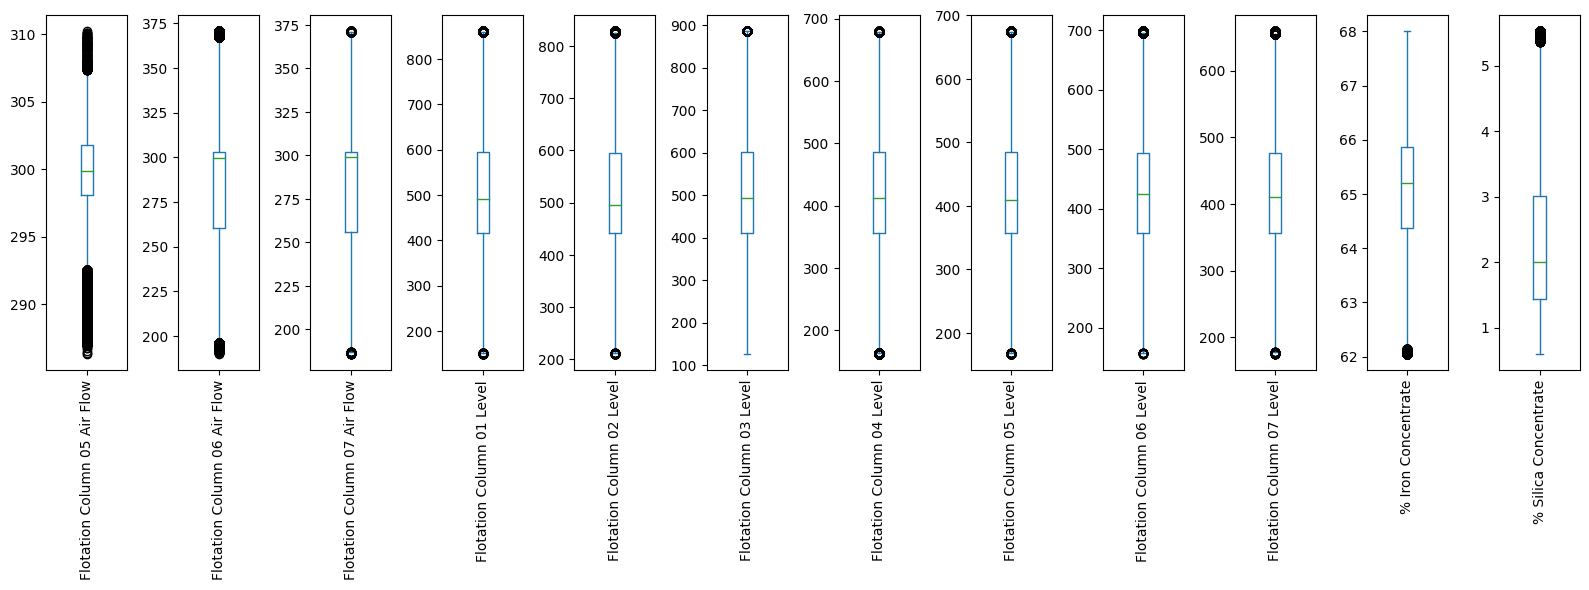

In [13]:
raw_df.iloc[:,12:].plot(kind='box', subplots=True, figsize=[16,6], rot=90);
plt.tight_layout()

We didn't see any significant outliers. So we will not delete them.

Let's check if there are any correlations between the features.

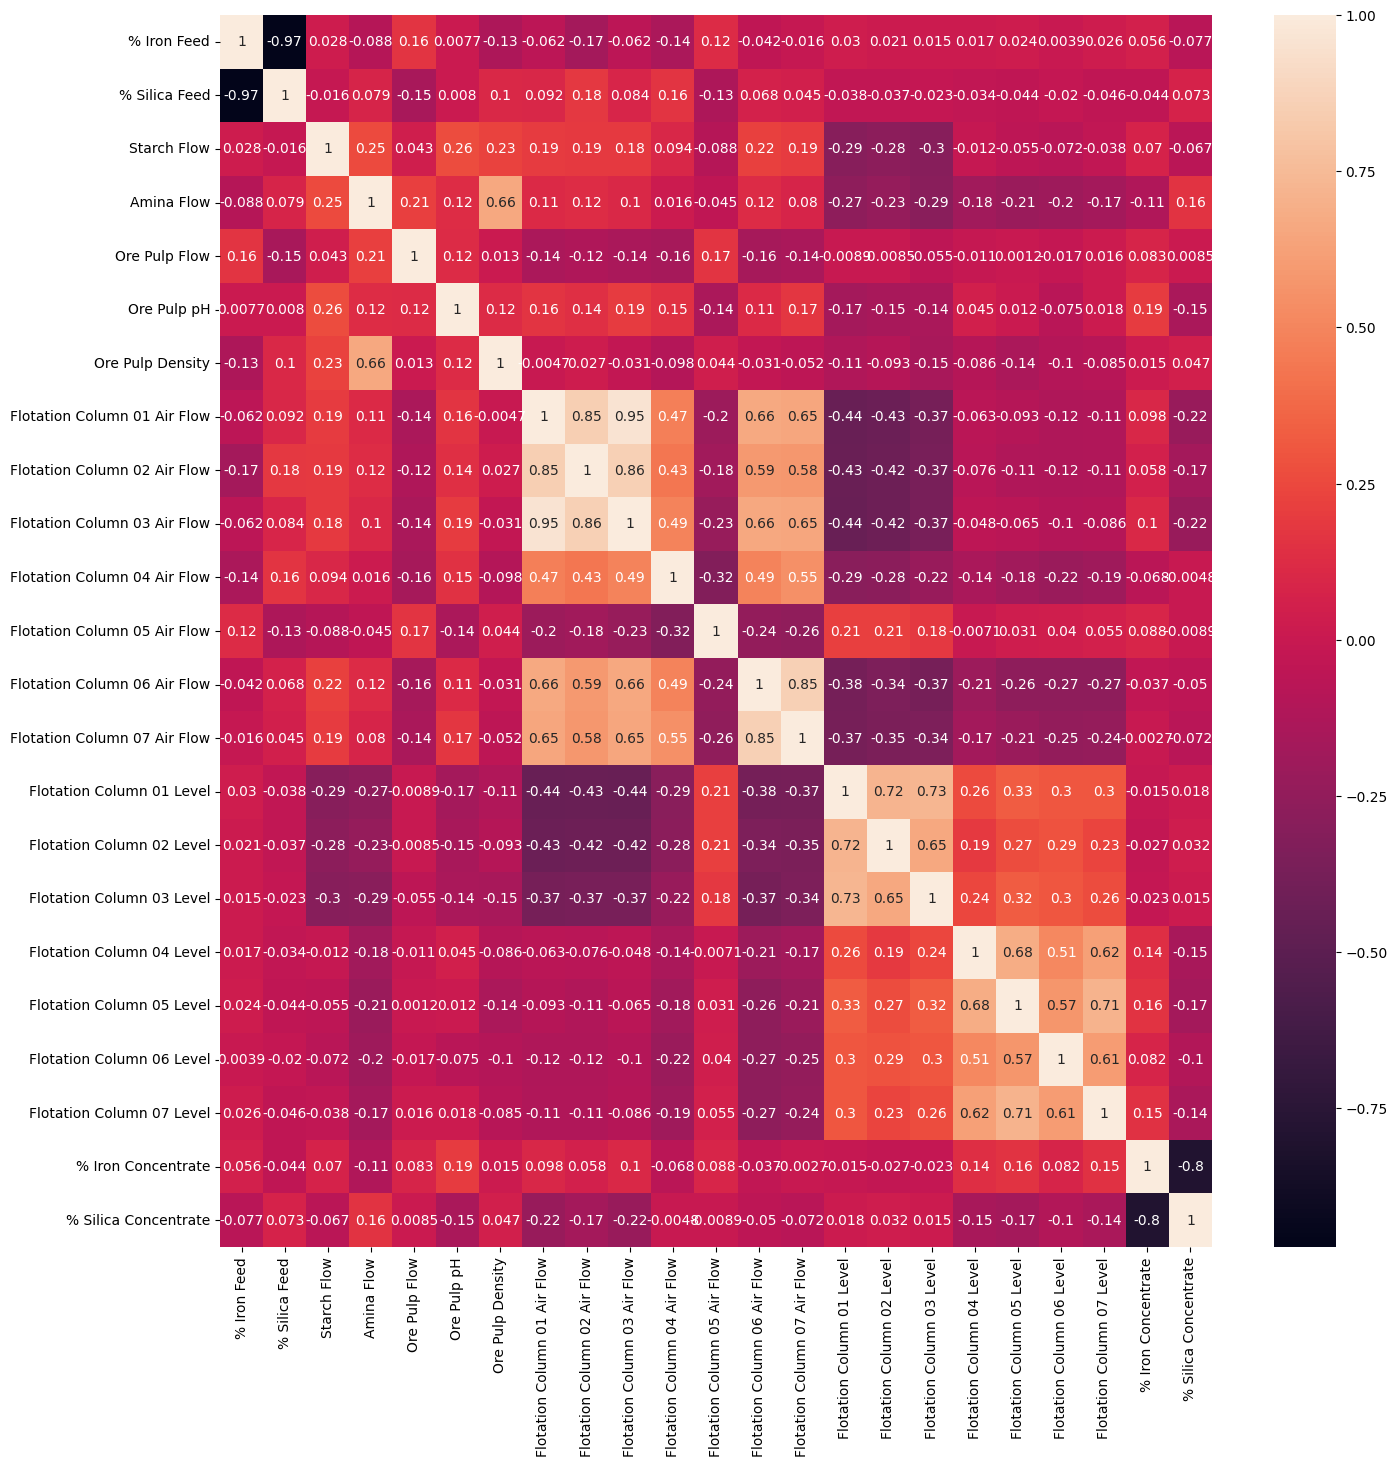

In [14]:
plt.figure(figsize=(16, 16))
sns.heatmap(raw_df.corr(numeric_only=True), annot=True);

We can see strong negative correlation between '% Iron Feed' and '% Silica Feed' and strong positive correlation between 'Flotation Column 01 Air Flow' and 'Flotation Column 03 Air Flow'.  
To get rid of the multicollineariry problem we will delete column '% Iron Feed' and 'Flotation Column 01 Air Flow'.

Column '% Iron Concentrate' is the final iron ore pulp quality measurement from the lab.  
This column cannot be used as predictor, as it is a result of the technological process, not a parameter of it. We will delete this column.

In [15]:
features_to_drop = ['% Iron Feed', 'Flotation Column 01 Air Flow', '% Iron Concentrate']
raw_df.drop(columns=features_to_drop, inplace=True)

### Feature engineering

There is a possibility that ore quality depends on the time of day or day of the week. Let's find out.

In [16]:
hour = raw_df['date'].dt.hour
dow = raw_df['date'].dt.dayofweek

<AxesSubplot: xlabel='date', ylabel='% Silica Concentrate'>

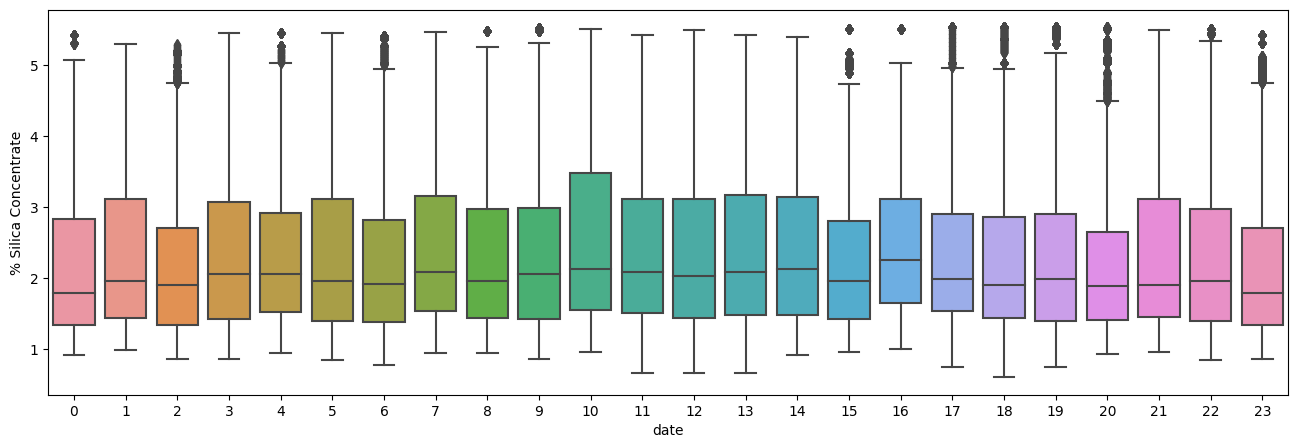

In [17]:
plt.figure(figsize=[16,5])
sns.boxplot(x=hour, y=raw_df['% Silica Concentrate'])

<AxesSubplot: xlabel='date', ylabel='% Silica Concentrate'>

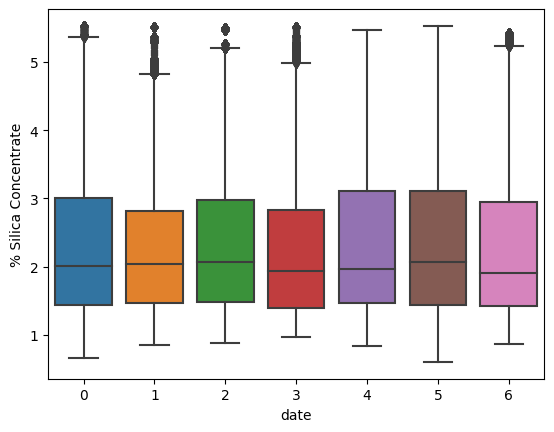

In [18]:
sns.boxplot(x=dow, y=raw_df['% Silica Concentrate'])

We do not see any correlation. So we will drop 'date' column.

In [19]:
raw_df.drop(columns=['date'], inplace=True)

### Target distribution

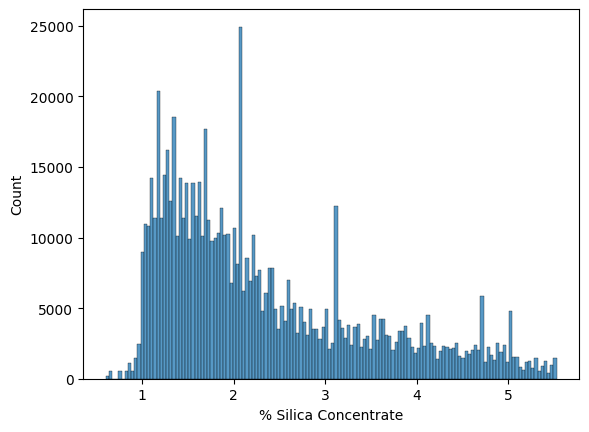

In [20]:
sns.histplot(raw_df['% Silica Concentrate']);

The distribution is skewed to the left. Let's make logarithmic transformation.

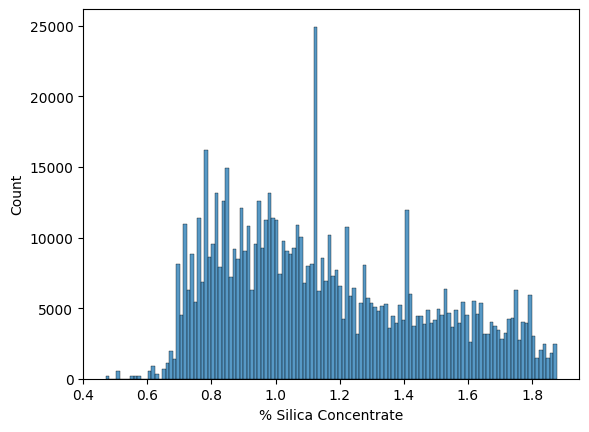

In [21]:
sns.histplot(np.log1p(raw_df['% Silica Concentrate']));

Now distribution is more symmetric. 

Let's create helper functions to transform target variable.

In [22]:
def target_to_y(target):
    return np.log1p(target)

def y_to_target(y):
    return np.expm1(y)

## Models training

Let's split our data into train, validation, and test sets.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_full_train, df_test = train_test_split(raw_df, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [25]:
def prepare_X_y(df, target_col):
    X = df.drop(columns=target_col).values
    y = target_to_y(df[target_col].values)
    return X, y

In [26]:
target_col = '% Silica Concentrate'
feature_names = raw_df.columns.drop(target_col)

X_full_train, y_full_train = prepare_X_y(df_train, target_col)
X_train, y_train = prepare_X_y(df_train, target_col)
X_val, y_val = prepare_X_y(df_val, target_col)
X_test, y_test = prepare_X_y(df_test, target_col)

del df_full_train, df_train, df_val, df_test

Our problem is a regression problem. We will use the mean squared error for evauluting the model.

In [27]:
from sklearn.metrics import mean_squared_error

Let's create a helper function to score the model.

In [28]:
def score_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train, )
    scores = dict()
    y_train_pred = model.predict(X_train)
    scores['train'] = mean_squared_error(y_train, y_train_pred, squared=False)
    y_val_pred = model.predict(X_val)
    scores['val'] = mean_squared_error(y_val, y_val_pred, squared=False)
    return scores

### Linear regression

For Linear regression data should be scaled. We wil use StandardScaler.  
Assemble Linearregression and StandardScaler into one estimator with Pipeline.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [30]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('lr', LinearRegression())]
)

In [31]:
print('RMSE: ', score_model(lr_pipe, X_train, y_train, X_val, y_val))

RMSE:  {'train': 0.28891744935846375, 'val': 0.28852360786273684}


### Random forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(n_estimators=10, n_jobs=N_JOBS, random_state=SEED)

In [34]:
print('RMSE: ', score_model(rf, X_train, y_train, X_val, y_val))

RMSE:  {'train': 0.03513376147180548, 'val': 0.07814461064368954}


### XGBoost

In [35]:
import xgboost as xgb

In [36]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [37]:
xgb_params = {  
    'objective': 'reg:squarederror',
    'nthread': N_JOBS,
    'seed': SEED,
}

In [38]:
evals = [(dtrain, 'train'), (dval, 'val')]
num_boost_round = 20

In [39]:
evals_result = {}
bst = xgb.train(
            params=xgb_params,
            dtrain=dtrain,
            num_boost_round=num_boost_round,
            evals=evals,
            evals_result=evals_result,
            verbose_eval=False
        )

In [40]:
print("RMSE: {'train': %s , 'val': %s}" % (evals_result['train']['rmse'][-1], evals_result['val']['rmse'][-1]))

RMSE: {'train': 0.22344079818571583 , 'val': 0.2239770269387278}


Not the best result. Let's se  what we can achieve with the hyperparameters tunung.

#### Hyperparameter tuning

Let's create a helper function to tune the booster.

In [41]:
def tune_booster(param):
    scores = {}
    param_name = param[0]
    param_values = param[1]
    for param_value in param_values:
        evals_result = {}
        xgb_params[param_name] = param_value

        bst = xgb.train(
            params=xgb_params,
            dtrain=dtrain,
            num_boost_round=num_boost_round,
            evals=evals,
            evals_result=evals_result,
            verbose_eval=False
        )
        scores[f'{param_name} = {param_value}'] = evals_result['val']['rmse']
    
    df_scores = pd.DataFrame(
        scores,
        index = pd.RangeIndex(start=1, stop=num_boost_round + 1, name='iteration')
    )
    print(df_scores.min())    
    df_scores.plot(title='RMSE on validation', figsize=[8, 2])
    plt.grid()

**Tune eta**

eta = 0.3     0.223977
eta = 0.1     0.260068
eta = 0.01    0.610654
dtype: float64


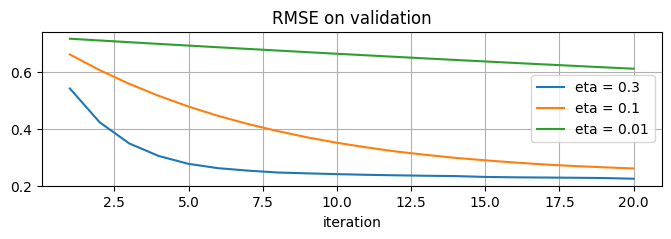

In [42]:
param = ('eta', [0.3, 0.1, 0.01])
tune_booster(param)

In [43]:
xgb_params['eta'] = 0.3

**Tune max_depth**

max_depth = 2     0.274954
max_depth = 3     0.262807
max_depth = 5     0.234135
max_depth = 8     0.186694
max_depth = 12    0.127979
max_depth = 20    0.077323
dtype: float64


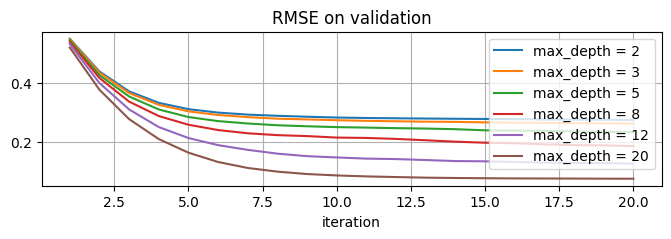

In [44]:
param = ('max_depth', [2, 3, 5, 8, 12, 20])
tune_booster(param)

In [45]:
xgb_params['max_depth'] = 20

**Tune min_child_weight**

min_child_weight = 1     0.077323
min_child_weight = 2     0.077021
min_child_weight = 5     0.077303
min_child_weight = 10    0.079773
dtype: float64


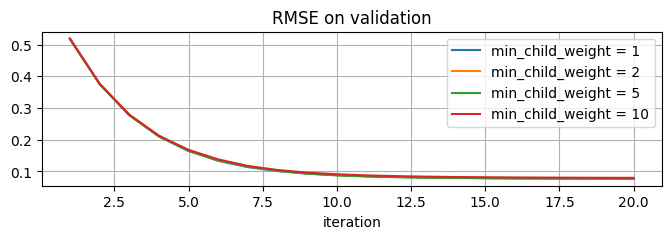

In [46]:
param = ('min_child_weight', [1, 2, 5, 10])
tune_booster(param)

In [47]:
xgb_params['min_child_weight'] = 2

Re-train the model with the found parameters

In [48]:
evals_result = {}
bst = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds = True,
    evals_result=evals_result,
    verbose_eval=False
)

In [49]:
print("RMSE: {'train': %s , 'val': %s}" % (evals_result['train']['rmse'][-1], evals_result['val']['rmse'][-1]))

RMSE: {'train': 0.02169092206817035 , 'val': 0.07702093494888664}


## Model selection

We select XGBooster as production model.  
Lets retrain it on full_train dataset and test on test dataset.

In [50]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [51]:
xgb_params = {  
    'objective': 'reg:squarederror',
    'eta': 0.3,
    'max_depth': 20,
    'min_child_weight': 2,
    'nthread': N_JOBS,
    'seed': SEED,
}

In [52]:
evals = [(dfulltrain, 'full_train'), (dtest, 'test')]
num_boost_round = 200

In [53]:
evals_result = {}
bst = xgb.train(
    params=xgb_params,
    dtrain=dfulltrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds = True,
    evals_result=evals_result,
    verbose_eval=False
)

In [54]:
print("RMSE: {'full_train': %s , 'test': %s}" % (evals_result['full_train']['rmse'][-1], evals_result['test']['rmse'][-1]))

RMSE: {'full_train': 0.00977794893158784 , 'test': 0.07500734914861788}


We got an error of about 3%. For such a complex process as ore flotation, this is not such a bad result

## Model saving

Save model as Python object

In [55]:
MODELS_DIR = '../models'

In [56]:
model = bst

In [57]:
import pickle
from pathlib import Path

In [58]:
model_path = Path(MODELS_DIR) / 'model.bin'
with open(model_path, 'wb') as f_out:
    pickle.dump(model, f_out)

In [59]:
# # Uncomment to load model
# with open(model_path, 'rb') as f_in:
#     model = pickle.load(f_in)

Save as Bentoml model

In [60]:
import bentoml

In [61]:
bentoml.xgboost.save_model(
    'ore_impurity_model',
    model,
)

Model(tag="ore_impurity_model:p34l5je4zwqz2mef", path="C:\Users\Nikolay\bentoml\models\ore_impurity_model\p34l5je4zwqz2mef\")

Prepare sample for testing

In [62]:
import json
with open('.././tests/sample.json', 'w') as f_out:
    json.dump(list(X_train[0]), f_out)